# OBJECTIVE:

# To apply K-nearest neighbor on Amazon reviews

In [1]:
import pandas as pd
data=pd.read_csv('Reviews.csv')
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [2]:
# Functions to use and retireve files 
import pickle
def savetofile(obj,filename):
   pickle.dump(obj,open(filename,"wb"))
def openfromfile(filename):
   temp = pickle.load(open(filename,"rb"))
   return temp

In [3]:
#Loading the variable from file
final_100000 = openfromfile("f_string.pickle")

In [4]:
#taking 60k points only out of 100K points
final_60000=final_100000[0:60000]
final_60000.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText
0,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,pos,939340800,EVERY book is educational,this witty little book makes my son laugh at l...,witti littl book make son laugh loud recit car...
1,150501,0006641040,AJ46FKXOVC7NR,Nicholas A Mesiano,2,2,pos,940809600,This whole series is great way to spend time w...,I can remember seeing the show when it aired o...,rememb see show air televis year ago child sis...
2,451856,B00004CXX9,AIUWLEQ1ADEG5,Elizabeth Medina,0,0,pos,944092800,Entertainingl Funny!,Beetlejuice is a well written movie ..... ever...,beetlejuic well written movi everyth excel act...
3,374359,B00004CI84,A344SMIA5JECGM,Vincent P. Ross,1,2,pos,944438400,A modern day fairy tale,"A twist of rumplestiskin captured on film, sta...",twist rumplestiskin captur film star michael k...
4,451855,B00004CXX9,AJH6LUC1UT1ON,The Phantom of the Opera,0,0,pos,946857600,FANTASTIC!,Beetlejuice is an excellent and funny movie. K...,beetlejuic excel funni movi keaton hilari wack...


In [5]:
final_60000['Score'].value_counts()

pos    49772
neg    10228
Name: Score, dtype: int64

In [6]:
#Making the index from 0 to en
final_60000= final_60000.reset_index(drop=True)
final_60000.shape

(60000, 11)

In [7]:
#In the Score column, assigning positive as 1 and negative as 0
def pos_neg(x):
    if x == 'pos':
        return 1
    return 0
final_60000['Score'] = final_60000['Score'].map(pos_neg)

In [8]:
savetofile(final_60000,"f1_string.pickle")

In [9]:
final_60000 = openfromfile("f1_string.pickle")

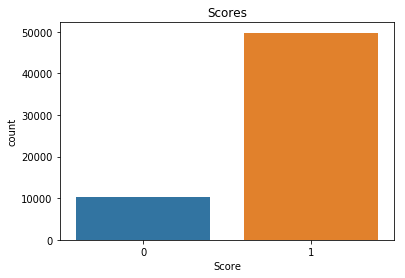

1    49772
0    10228
Name: Score, dtype: int64

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
ax=plt.axes()
sns.countplot(final_60000.Score,ax=ax)
plt.title("Scores")
plt.show()
final_60000['Score'].value_counts()

In [12]:
#storing cleanedtext into x and Score into y
x = final_60000['CleanedText']
y = final_60000['Score']
#Splitting the data into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, shuffle=False)
#splitting train data as train as 60% and  cross_validation as 20% and test data as 20%
x_tr, x_cv, y_tr, y_cv = train_test_split(X_train, Y_train, test_size=0.25,shuffle=False)
print(x_tr.shape)
print(x_cv.shape)
print(X_test.shape)
print(y_tr.shape)
print(y_cv.shape)
print(Y_test.shape)

(36000,)
(12000,)
(12000,)
(36000,)
(12000,)
(12000,)


# 1.BOW:

In [14]:
#Bag of words:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
#vectorizing the train data,cross validate data and test data.
bow = count_vect.fit_transform(x_tr)
bow1 = count_vect.transform(x_cv)
bow2 = count_vect.transform(X_test)
#preprocessing the train data,cross validate data and test data.
from sklearn import preprocessing
Tr_BOW_X = preprocessing.normalize(bow)
CV_BOW_X = preprocessing.normalize(bow1)
Te_BOW_X = preprocessing.normalize(bow2)

In [18]:
savetofile(Tr_BOW_X,"Tr1_BOW_X.pickle")
savetofile(CV_BOW_X,"CV1_BOW_X.pickle")
savetofile(Te_BOW_X,"Te1_BOW_X.pickle")

In [17]:
print(Tr_BOW_X.shape)
print(CV_BOW_X.shape)
print(Te_BOW_X.shape)

(36000, 26440)
(12000, 26440)
(12000, 26440)


# 1.1.Brute Force Algorithm:

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
f1_score_=[]
acc_score = []
#Taking nearest neighbors as 5,10,15,20,25,30......50
neigh = list(range(5,50,5))
#finding the optimal k using maximum f1_score value
for k in neigh:
    print(k,end=',') 
    pred = []
    knn = KNeighborsClassifier(n_neighbors=k,algorithm='brute')
    knn.fit(Tr_BOW_X, y_tr)
    #taking cross validate data in intervals of 500 for prediction
    for i in range(0,CV_BOW_X.shape[0], 500):
        t = CV_BOW_X[i:i+500]
        pred1 = knn.predict(t)
        pred.extend(pred1) 
    k= f1_score(y_cv,pred)
    print(k)
    f1_score_.append(k)
#list of f1_scores for respective nearest neighbors    
print("f1_score on cross validate data:",f1_score_)
#finding accuracy on test data with predicted values
accuracy = accuracy_score(Y_test, pred)
print("Accuracy on test data for n nearest neighbours:",accuracy * 100)

5,0.90759926867
10,0.911411271542
15,0.911651021535
20,0.911180581096
25,0.909956947879
30,0.910223525101
35,0.909698078683
40,0.909981236557
45,0.909057672973
f1_score on cross validate data: [0.90759926867001073, 0.91141127154168611, 0.9116510215350635, 0.9111805810959912, 0.90995694787945403, 0.91022352510076954, 0.90969807868252506, 0.90998123655667928, 0.90905767297322004]
Accuracy on test data for n nearest neighbours: 80.2583333333


In [24]:
#finding the optimal k using maximum f1_score value
print("maximum f1 score value",max(f1_score_))
#finding the index value of f1_score value which is maximum
a=f1_score_.index(max(f1_score_)) 
print("best f1 score index value:",a)
#optimal k value index is same as maximum f1 score index value
optimal_k=neigh[a]
print("optimal k value:",optimal_k)

maximum f1 score value 0.911651021535
best f1 score index value: 2
optimal k value: 15


In [25]:
#Using optimal k value to find accuracy on test data
knn_optimal = KNeighborsClassifier(n_neighbors  = optimal_k,algorithm='brute')
knn_optimal.fit(Tr_BOW_X, y_tr)
pred1 = []
for i in range(0,Te_BOW_X.shape[0],200):
    y = Te_BOW_X[i:i+200]
    pred = knn_optimal.predict(y)
    pred1.extend(pred)
accuracy = accuracy_score(Y_test, pred1)
print("Accuracy on test data:",accuracy * 100)

Accuracy on test data: 81.4083333333


Accuracy on test set: 81.408%
Precision on test set: 0.815
Recall on test set: 0.994
F1-Score on test set: 0.896
Confusion Matrix of test set:
 [ [TN  FP]
 [FN TP] ]



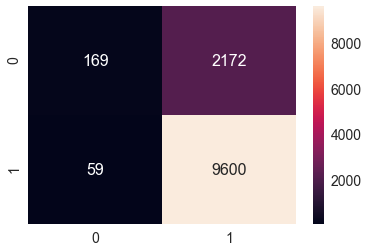

In [26]:
#Using optimal k value to find accuracy,precision,recall,f1_score on test data
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
print("Accuracy on test set: %0.3f%%"%(accuracy_score(Y_test, pred1)*100))
print("Precision on test set: %0.3f"%(precision_score(Y_test, pred1)))
print("Recall on test set: %0.3f"%(recall_score(Y_test, pred1)))
print("F1-Score on test set: %0.3f"%(f1_score(Y_test, pred1)))
print("Confusion Matrix of test set:\n [ [TN  FP]\n [FN TP] ]\n")
df_cm = pd.DataFrame(confusion_matrix(Y_test,pred1), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

# 1.2.kd-tree Algorithm:

In [27]:
#conversting sparse data into dense data
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=300, n_iter=5)
dense_Tr_BOW_X=svd.fit_transform(Tr_BOW_X)  
dense_CV_BOW_X=svd.transform(CV_BOW_X)  
dense_Te_BOW_X=svd.transform(Te_BOW_X)
print(dense_Tr_BOW_X.shape)
print(dense_CV_BOW_X.shape)
print(dense_Te_BOW_X.shape)

(36000, 300)
(12000, 300)
(12000, 300)


In [28]:
savetofile(dense_Tr_BOW_X,"Tr2_BOW_X.pickle")
savetofile(dense_CV_BOW_X,"CV2_BOW_X.pickle")
savetofile(dense_Te_BOW_X,"Te2_BOW_X.pickle")

In [ ]:
dense_Tr_BOW_X = openfromfile("Tr2_BOW_X.pickle")
dense_CV_BOW_X = openfromfile("CV2_BOW_X.pickle")
dense_Te_BOW_X= openfromfile("Te2_BOW_X.pickle")

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
f1_score_=[]
acc_score = []
#Taking nearest neighbors as 5,10,15,20,25,30......50
neigh = list(range(5,50,5))
#finding the optimal k using maximum f1_score value
for k in neigh:
    print(k,end=',') 
    pred = []
    knn = KNeighborsClassifier(n_neighbors=k,algorithm='kd_tree')
    knn.fit(dense_Tr_BOW_X, y_tr)
    #taking cross validate data in intervals of 500 for prediction
    for i in range(0,dense_CV_BOW_X.shape[0], 500):
        t = dense_CV_BOW_X[i:i+500]
        pred1 = knn.predict(t)
        pred.extend(pred1)
    k= f1_score(y_cv,pred)
    print(k)
    f1_score_.append(k) 
#list of f1_scores for respective nearest neighbors    
print("f1_score on cross validate data:",f1_score_) 
#finding accuracy on test data with predicted values
accuracy = accuracy_score(Y_test, pred)
print("Accuracy on test data for n nearest neighbours:",accuracy * 100)

5,0.887606175794
10,0.898588289748
15,0.903926329775
20,0.904690002288
25,0.905787840058
30,0.906278517978
35,0.906570607815
40,0.906388217592
45,0.906704343467
f1_score on cross validate data: [0.88760617579426526, 0.89858828974774363, 0.90392632977504928, 0.90469000228780605, 0.90578784005842605, 0.90627851797773318, 0.90657060781542109, 0.90638821759153709, 0.90670434346656947]
Accuracy on test data for n nearest neighbours: 80.4


In [30]:
#finding the optimal k using maximum f1_score value
print("maximum f1 score value",max(f1_score_))
#finding the index value of f1_score value which is maximum
a=f1_score_.index(max(f1_score_)) 
print("best f1 score index value:",a)
#optimal k value index is same as maximum f1 score index value
optimal_k=neigh[a]
print("optimal k value:",optimal_k)

maximum f1 score value 0.906704343467
best f1 score index value: 8
optimal k value: 45


In [31]:
#Using optimal k value to find accuracy on test data
knn_optimal = KNeighborsClassifier(n_neighbors  = optimal_k,algorithm='kd_tree')
knn_optimal.fit(dense_Tr_BOW_X, y_tr)
pred1 = []
for i in range(0,dense_Te_BOW_X.shape[0],200):
    y = dense_Te_BOW_X[i:i+200]
    pred = knn_optimal.predict(y)
    pred1.extend(pred)
accuracy = accuracy_score(Y_test, pred1)
print("Accuracy on test data:",accuracy * 100)

Accuracy on test data: 79.5916666667


Accuracy on test set: 79.592%
Precision on test set: 0.804
Recall on test set: 0.987
F1-Score on test set: 0.886
Confusion Matrix of test set:
 [ [TN  FP]
 [FN TP] ]



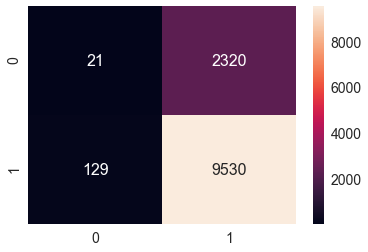

In [32]:
#Using optimal k value to find accuracy,precision,recall,f1_score on test data
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
print("Accuracy on test set: %0.3f%%"%(accuracy_score(Y_test, pred1)*100))
print("Precision on test set: %0.3f"%(precision_score(Y_test, pred1)))
print("Recall on test set: %0.3f"%(recall_score(Y_test, pred1)))
print("F1-Score on test set: %0.3f"%(f1_score(Y_test, pred1)))
print("Confusion Matrix of test set:\n [ [TN  FP]\n [FN TP] ]\n")
df_cm = pd.DataFrame(confusion_matrix(Y_test,pred1), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

# 2.TF-IDF:

In [16]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(ngram_range=(1,2))
#vectorizing the train data,cross validate data and test data.
tfidf1 = tfidf.fit_transform(x_tr)
tfidf2 = tfidf.transform(x_cv)
tfidf3 = tfidf.transform(X_test)
#preprocessing the train data,cross validate data and test data.
from sklearn import preprocessing
Tr_TFIDF_X = preprocessing.normalize(tfidf1)
CV_TFIDF_X = preprocessing.normalize(tfidf2)
Te_TFIDF_X = preprocessing.normalize(tfidf3)

In [17]:
savetofile(Tr_TFIDF_X,"Tr1_TFIDF_X.pickle")
savetofile(CV_TFIDF_X,"CV1_TFIDF_X.pickle")
savetofile(Te_TFIDF_X,"Te1_TFIDF_X.pickle")

In [33]:
Tr_TFIDF_X = openfromfile("Tr1_TFIDF_X.pickle")
CV_TFIDF_X = openfromfile("CV1_TFIDF_X.pickle")
Te_TFIDF_X= openfromfile("Te1_TFIDF_X.pickle")

In [34]:
print(Tr_TFIDF_X.shape)
print(CV_TFIDF_X.shape)
print(Te_TFIDF_X.shape)

(36000, 573320)
(12000, 573320)
(12000, 573320)


# 2.1.Brute Force Algorithm:

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
f1_score_=[]
acc_score = []
#Taking nearest neighbors as 5,10,15,20,25,30......50
neigh = list(range(5,50,5))
#finding the optimal k using maximum f1_score value
for k in neigh:
    print(k,end=',') 
    pred = []
    knn = KNeighborsClassifier(n_neighbors=k,algorithm='brute')
    knn.fit(Tr_TFIDF_X, y_tr)
    #taking cross validate data in intervals of 500 for prediction
    for i in range(0,CV_TFIDF_X.shape[0], 500):
        t = CV_TFIDF_X[i:i+500]
        pred1 = knn.predict(t)
        pred.extend(pred1)
    k= f1_score(y_cv,pred)
    print(k)
    f1_score_.append(k)
#list of f1_scores for respective nearest neighbors    
print("f1_score on cross validate data:",f1_score_)
#finding accuracy on test data with predicted values
accuracy = accuracy_score(Y_test, pred)
print("Accuracy on test data for n nearest neighbours:",accuracy * 100)

5,0.910204272426
10,0.912762294701
15,0.912177393385
20,0.912317807715
25,0.911449262077
30,0.911198680352
35,0.910421813524
40,0.910979907547
45,0.91046277666
f1_score on cross validate data: [0.91020427242555979, 0.91276229470060022, 0.91217739338455173, 0.91231780771529725, 0.91144926207718402, 0.91119868035190599, 0.9104218135236527, 0.91097990754725633, 0.91046277665995978]
Accuracy on test data for n nearest neighbours: 80.1916666667


In [36]:
#finding the optimal k using maximum f1_score value
print("maximum f1 score value",max(f1_score_))
#finding the index value of f1_score value which is maximum
a=f1_score_.index(max(f1_score_)) 
print("best f1 score index value:",a)
#optimal k value index is same as maximum f1 score index value
optimal_k=neigh[a]
print("optimal k value:",optimal_k)

maximum f1 score value 0.912762294701
best f1 score index value: 1
optimal k value: 10


In [37]:
#Using optimal k value to find accuracy on test data
knn_optimal = KNeighborsClassifier(n_neighbors  = optimal_k,algorithm='brute')
knn_optimal.fit(Tr_TFIDF_X,y_tr)
pred1 = []
for i in range(0,Te_TFIDF_X.shape[0],200):
    y = Te_TFIDF_X[i:i+200]
    pred = knn_optimal.predict(y)
    pred1.extend(pred)
accuracy = accuracy_score(Y_test, pred1)
print("Accuracy on test data:",accuracy * 100)

Accuracy on test data: 81.725


Accuracy on test set: 81.725%
Precision on test set: 0.823
Recall on test set: 0.985
F1-Score on test set: 0.897
Confusion Matrix of test set:
 [ [TN  FP]
 [FN TP] ]



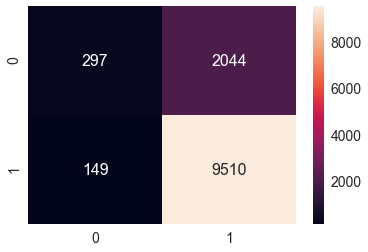

In [38]:
#Using optimal k value to find accuracy,precision,recall,f1_score on test data
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
print("Accuracy on test set: %0.3f%%"%(accuracy_score(Y_test, pred1)*100))
print("Precision on test set: %0.3f"%(precision_score(Y_test, pred1)))
print("Recall on test set: %0.3f"%(recall_score(Y_test, pred1)))
print("F1-Score on test set: %0.3f"%(f1_score(Y_test, pred1)))
print("Confusion Matrix of test set:\n [ [TN  FP]\n [FN TP] ]\n")
df_cm = pd.DataFrame(confusion_matrix(Y_test,pred1), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

# 2.2.kd-tree Algorithm:

In [39]:
#conversting sparse data into dense data
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=300, n_iter=5)
dense_Tr_TFIDF_X=svd.fit_transform(Tr_TFIDF_X)  
dense_CV_TFIDF_X=svd.transform(CV_TFIDF_X)  
dense_Te_TFIDF_X=svd.transform(Te_TFIDF_X)
print(dense_Tr_TFIDF_X.shape)
print(dense_CV_TFIDF_X.shape)
print(dense_Te_TFIDF_X.shape)

(36000, 300)
(12000, 300)
(12000, 300)


In [40]:
savetofile(dense_Tr_TFIDF_X,"dense_Tr_TFIDF_X.pickle")
savetofile(dense_CV_TFIDF_X,"dense_CV_TFIDF_X.pickle")
savetofile(dense_Te_TFIDF_X,"dense_Te_TFIDF_X.pickle")

In [41]:
dense_Tr_TFIDF_X = openfromfile("dense_Tr_TFIDF_X.pickle")
dense_CV_TFIDF_X = openfromfile("dense_CV_TFIDF_X.pickle")
dense_Te_TFIDF_X= openfromfile("dense_Te_TFIDF_X.pickle")

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
f1_score_=[]
acc_score = []
#Taking nearest neighbors as 5,10,15,20,25,30......50
neigh = list(range(5,50,5))
#finding the optimal k using maximum f1_score value
for k in neigh:
    print(k,end=',') 
    pred = []
    knn = KNeighborsClassifier(n_neighbors=k,algorithm='kd_tree')
    knn.fit(dense_Tr_TFIDF_X, y_tr)
    #taking cross validate data in intervals of 500 for prediction
    for i in range(0,dense_CV_TFIDF_X.shape[0], 500):
        t = dense_CV_TFIDF_X[i:i+500]
        pred1 = knn.predict(t)
        pred.extend(pred1)
    k= f1_score(y_cv,pred)
    print(k)
    f1_score_.append(k) 
#list of f1_scores for respective nearest neighbors    
print("f1_score on cross validate data:",f1_score_) 
#finding accuracy on test data with predicted values
accuracy = accuracy_score(Y_test, pred)
print("Accuracy on test data for n nearest neighbours:",accuracy * 100)

5,0.876114965312
10,0.888330307685
15,0.90030738175
20,0.9008942903
25,0.904107085751
30,0.904065783463
35,0.905192079569
40,0.905150782426
45,0.906040574424
f1_score on cross validate data: [0.87611496531219035, 0.88833030768514643, 0.90030738174978209, 0.9008942903003897, 0.90410708575083376, 0.90406578346276845, 0.9051920795693037, 0.90515078242620572, 0.90604057442443575]
Accuracy on test data for n nearest neighbours: 80.4


In [44]:
#finding the optimal k using maximum f1_score value
print("maximum f1 score value",max(f1_score_))
#finding the index value of f1_score value which is maximum
a=f1_score_.index(max(f1_score_)) 
print("best f1 score index value:",a)
#optimal k value index is same as maximum f1 score index value
optimal_k=neigh[a]
print("optimal k value:",optimal_k)

maximum f1 score value 0.906040574424
best f1 score index value: 8
optimal k value: 45


In [45]:
#Using optimal k value to find accuracy on test data
knn_optimal = KNeighborsClassifier(n_neighbors  = optimal_k,algorithm='kd_tree')
knn_optimal.fit(dense_Tr_TFIDF_X,y_tr)
pred1 = []
for i in range(0,dense_Te_TFIDF_X.shape[0],200):
    y = dense_Te_TFIDF_X[i:i+200]
    pred = knn_optimal.predict(y)
    pred1.extend(pred)
accuracy = accuracy_score(Y_test, pred1)
print("Accuracy on test data:",accuracy * 100)

Accuracy on test data: 80.4416666667


Accuracy on test set: 80.442%
Precision on test set: 0.805
Recall on test set: 0.999
F1-Score on test set: 0.892
Confusion Matrix of test set:
 [ [TN  FP]
 [FN TP] ]



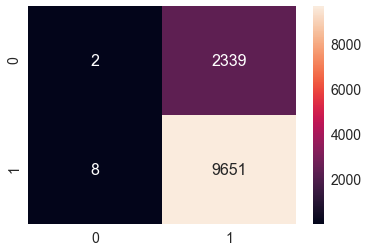

In [46]:
#Using optimal k value to find accuracy,precision,recall,f1_score on test data
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
print("Accuracy on test set: %0.3f%%"%(accuracy_score(Y_test, pred1)*100))
print("Precision on test set: %0.3f"%(precision_score(Y_test, pred1)))
print("Recall on test set: %0.3f"%(recall_score(Y_test, pred1)))
print("F1-Score on test set: %0.3f"%(f1_score(Y_test, pred1)))
print("Confusion Matrix of test set:\n [ [TN  FP]\n [FN TP] ]\n")
df_cm = pd.DataFrame(confusion_matrix(Y_test,pred1), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

# 3.Avg-W2V:

In [13]:
# converting train data into avg_w2vec data
list_of_sent_tr=[]
for sent in x_tr.values:
    list_of_sent_tr.append(sent.split())

In [15]:
#training w2vec model on train data
import gensim
from gensim.models import Word2Vec
w2v_model_tr=gensim.models.Word2Vec(list_of_sent_tr,min_count=5,size=50, workers=4)
words_tr = list(w2v_model_tr.wv.vocab)
print(len(words_tr))

8053


In [90]:
#finding avg w2v of train data
sent_vectors_tr = []; 
for sent in list_of_sent_tr:
    sent_vec = np.zeros(50) 
    cnt_words =0; 
    for word in sent:
        try:
            vec = w2v_model_tr.wv[word]
            sent_vec += vec
            cnt_words += 1
        except:
            pass
    sent_vec /= cnt_words
    sent_vectors_tr.append(sent_vec)
print(len(sent_vectors_tr))
print(len(sent_vectors_tr[0]))

36000
50


In [98]:
#preprocessing avg w2v of train data
from sklearn import preprocessing
avg_w2v_tr=preprocessing.scale(sent_vectors_tr)
print("standardized data shape is",avg_w2v_tr.shape)

standardized data shape is (36000, 50)


In [99]:
import pickle 
def savetofile(obj,filename):
    pickle.dump(obj,open(filename,"wb"))    
def openfromfile(filename):
    temp=pickle.load(open(filename,"rb"))
    return temp

In [100]:
savetofile(sent_vectors_tr,'avg_w2v_tr')

In [18]:
# converting train data into avg_w2vec data
list_of_sent_cv=[]
for sent in x_cv.values:
    list_of_sent_cv.append(sent.split())

In [54]:
#finding avg w2v of cv data
sent_vectors_cv = []; 
for sent in list_of_sent_cv:
    sent_vec = np.zeros(50)
    cnt_words =0;
    for word in sent:
        try:
            vec = w2v_model_tr.wv[word]
            sent_vec += vec
            cnt_words += 1
        except:
            pass
    sent_vec /= cnt_words
    sent_vectors_cv.append(sent_vec)
print(len(sent_vectors_cv))
print(len(sent_vectors_cv[0]))

12000
50


In [55]:
#preprocessing avg w2v of cv data
from sklearn import preprocessing
avg_w2v_cv=preprocessing.scale(sent_vectors_cv)
print("standardized data shape is",avg_w2v_cv.shape)

standardized data shape is (12000, 50)


In [56]:
savetofile(sent_vectors_cv,'avg_w2v_cv')

In [24]:
#converting test data into avg_w2vec data
list_of_sent_test=[]
for sent in X_test.values:
    list_of_sent_test.append(sent.split())

In [58]:
#finding avg w2v of test data
sent_vectors_test = [];
for sent in list_of_sent_test: 
    sent_vec = np.zeros(50) 
    cnt_words =0; 
    for word in sent: 
        try:
            vec = w2v_model_tr.wv[word]
            sent_vec += vec
            cnt_words += 1
        except:
            pass
    sent_vec /= cnt_words
    sent_vectors_test.append(sent_vec)
print(len(sent_vectors_test))
print(len(sent_vectors_test[0]))

12000
50


In [59]:
#preprocessing avg w2v of test data
from sklearn import preprocessing
avg_w2v_test=preprocessing.scale(sent_vectors_test)
print("standardized data shape is",avg_w2v_test.shape)

standardized data shape is (12000, 50)


In [60]:
savetofile(sent_vectors_test,'avg_w2v_test')

In [61]:
avg_w2v_tr = openfromfile("avg_w2v_tr")
avg_w2v_cv = openfromfile("avg_w2v_cv")
avg_w2v_test = openfromfile("avg_w2v_test")

# 3.1.Brute Force Algorithm:

In [63]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
f1_score_=[]
acc_score = []
#Taking nearest neighbors as 5,10,15,20,25,30......50
neigh = list(range(5,50,5))
#finding the optimal k using maximum f1_score value
for k in neigh:
    print(k,end=',') 
    pred = []
    knn = KNeighborsClassifier(n_neighbors=k,algorithm='brute')
    knn.fit(avg_w2v_tr, y_tr)
    #taking cross validate data in intervals of 500 for prediction
    for i in range(0,len(avg_w2v_cv), 500):
        t = avg_w2v_cv[i:i+500]
        pred1 = knn.predict(t)
        pred.extend(pred1)
    k= f1_score(y_cv,pred)
    print(k)
    f1_score_.append(k)
#list of f1_scores for respective nearest neighbors    
print("f1_score on cross validate data:",f1_score_)
#finding accuracy on test data with predicted values
accuracy = accuracy_score(Y_test, pred)
print("Accuracy on test data for n nearest neighbours:",accuracy * 100)

5,0.87231316726
10,0.877035638423
15,0.897203151638
20,0.897304768487
25,0.902948177989
30,0.902646762524
35,0.904696637427
40,0.904505163118
45,0.905822230334
f1_score on cross validate data: [0.87231316725978658, 0.87703563842341292, 0.89720315163802233, 0.89730476848652385, 0.90294817798937921, 0.90264676252404064, 0.90469663742690043, 0.90450516311797502, 0.90582223033400244]
Accuracy on test data for n nearest neighbours: 80.2583333333


In [64]:
#finding the optimal k using maximum f1_score value
print("maximum f1 score value",max(f1_score_))
#finding the index value of f1_score value which is maximum
a=f1_score_.index(max(f1_score_)) 
print("best f1 score index value:",a)
#optimal k value index is same as maximum f1 score index value
optimal_k=neigh[a]
print("optimal k value:",optimal_k)

maximum f1 score value 0.905822230334
best f1 score index value: 8
optimal k value: 45


In [65]:
#Using optimal k value to find accuracy on test data
knn_optimal = KNeighborsClassifier(n_neighbors  = optimal_k,algorithm='brute')
knn_optimal.fit(avg_w2v_tr,y_tr)
pred1 = []
for i in range(0,len(avg_w2v_test),200):
    y = avg_w2v_test[i:i+200]
    pred = knn_optimal.predict(y)
    pred1.extend(pred)
accuracy = accuracy_score(Y_test, pred1)
print("Accuracy on test data:",accuracy * 100)

Accuracy on test data: 80.2333333333


Accuracy on test set: 80.233%
Precision on test set: 0.805
Recall on test set: 0.996
F1-Score on test set: 0.890
Confusion Matrix of test set:
 [ [TN  FP]
 [FN TP] ]



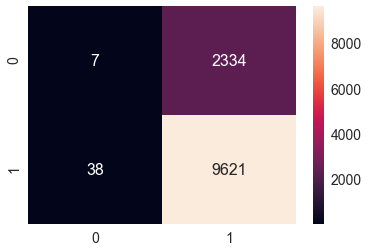

In [66]:
#Using optimal k value to find accuracy,precision,recall,f1_score on test data
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
print("Accuracy on test set: %0.3f%%"%(accuracy_score(Y_test, pred1)*100))
print("Precision on test set: %0.3f"%(precision_score(Y_test, pred1)))
print("Recall on test set: %0.3f"%(recall_score(Y_test, pred1)))
print("F1-Score on test set: %0.3f"%(f1_score(Y_test, pred1)))
print("Confusion Matrix of test set:\n [ [TN  FP]\n [FN TP] ]\n")
df_cm = pd.DataFrame(confusion_matrix(Y_test,pred1), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

# 3.2.kd-tree Algorithm:

In [67]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
f1_score_=[]
acc_score = []
#Taking nearest neighbors as 5,10,15,20,25,30......50
neigh = list(range(5,50,5))
#finding the optimal k using maximum f1_score value
for k in neigh:
    print(k,end=',') 
    pred = []
    knn = KNeighborsClassifier(n_neighbors=k,algorithm='kd_tree')
    knn.fit(avg_w2v_tr, y_tr)
    #taking cross validate data in intervals of 500 for prediction
    for i in range(0,len(avg_w2v_cv), 500):
        t = avg_w2v_cv[i:i+500]
        pred1 = knn.predict(t)
        pred.extend(pred1)
    k= f1_score(y_cv,pred)
    print(k)
    f1_score_.append(k)
#list of f1_scores for respective nearest neighbors    
print("f1_score on cross validate data:",f1_score_)
#finding accuracy on test data with predicted values
accuracy = accuracy_score(Y_test, pred)
print("Accuracy on test data for n nearest neighbours:",accuracy * 100)

5,0.87231316726
10,0.877035638423
15,0.897203151638
20,0.897304768487
25,0.902948177989
30,0.902646762524
35,0.904696637427
40,0.904505163118
45,0.905822230334
f1_score on cross validate data: [0.87231316725978658, 0.87703563842341292, 0.89720315163802233, 0.89730476848652385, 0.90294817798937921, 0.90264676252404064, 0.90469663742690043, 0.90450516311797502, 0.90582223033400244]
Accuracy on test data for n nearest neighbours: 80.2583333333


In [68]:
#finding the optimal k using maximum f1_score value
print("maximum f1 score value",max(f1_score_))
#finding the index value of f1_score value which is maximum
a=f1_score_.index(max(f1_score_)) 
print("best f1 score index value:",a)
#optimal k value index is same as maximum f1 score index value
optimal_k=neigh[a]
print("optimal k value:",optimal_k)

maximum f1 score value 0.905822230334
best f1 score index value: 8
optimal k value: 45


In [69]:
#Using optimal k value to find accuracy on test data
knn_optimal = KNeighborsClassifier(n_neighbors = optimal_k,algorithm='kd_tree')
knn_optimal.fit(avg_w2v_tr,y_tr)
pred1 = []
for i in range(0,len(avg_w2v_test),200):
    y = avg_w2v_test[i:i+200]
    pred = knn_optimal.predict(y)
    pred1.extend(pred)
accuracy = accuracy_score(Y_test, pred1)
print("Accuracy on test data:",accuracy * 100)

Accuracy on test data: 80.2333333333


Accuracy on test set: 80.233%
Precision on test set: 0.805
Recall on test set: 0.996
F1-Score on test set: 0.890
Confusion Matrix of test set:
 [ [TN  FP]
 [FN TP] ]



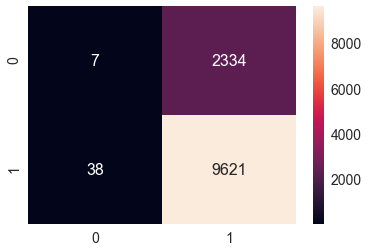

In [70]:
#Using optimal k value to find accuracy,precision,recall,f1_score on test data
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
print("Accuracy on test set: %0.3f%%"%(accuracy_score(Y_test, pred1)*100))
print("Precision on test set: %0.3f"%(precision_score(Y_test, pred1)))
print("Recall on test set: %0.3f"%(recall_score(Y_test, pred1)))
print("F1-Score on test set: %0.3f"%(f1_score(Y_test, pred1)))
print("Confusion Matrix of test set:\n [ [TN  FP]\n [FN TP] ]\n")
df_cm = pd.DataFrame(confusion_matrix(Y_test,pred1), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

# 4.Tf-idf- W2V:

In [17]:
#training tfidf model on train data
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))
tf_idf_tr = tf_idf_vect.fit_transform(x_tr.values)
print("shape of tf_idf:",tf_idf_tr.shape)

shape of tf_idf: (36000, 573320)


In [18]:
#finding tfidf w2v on train data
features =tf_idf_vect.get_feature_names()
tfidf_w2v_tr = []
row = 0
for sent in list_of_sent_tr:
    sent_vec = np.zeros(50)
    weighted_sum = 0
    for word in sent:
        if(word in words_tr):
            vec = w2v_model_tr.wv[word]
            tfidf =  tf_idf_tr[row,features.index(word)]
            sent_vec += (vec * tfidf)
            weighted_sum += tfidf
    if(weighted_sum != 0):
        sent_vec /= weighted_sum
    tfidf_w2v_tr.append(sent_vec)      
    row += 1
    if row % 100 == 0:
        print(row,end='\r')

In [36]:
import pickle 
def savetofile(obj,filename):
    pickle.dump(obj,open(filename,"wb"))    
def openfromfile(filename):
    temp=pickle.load(open(filename,"rb"))
    return temp

In [21]:
savetofile(tfidf_w2v_tr,'tfidf_w2v_tr')

In [22]:
#finding tfidf w2v on cv data
import numpy as np
features =tf_idf_vect.get_feature_names()
tfidf_w2v_cv = []
row = 0
for sent in list_of_sent_cv:
    sent_vec = np.zeros(50)
    weighted_sum = 0
    for word in sent:
        if(word in words_tr):
            vec = w2v_model_tr.wv[word]
            tfidf = tf_idf_tr[row,features.index(word)]
            sent_vec += (vec * tfidf)
            weighted_sum += tfidf
    if(weighted_sum != 0):
        sent_vec /= weighted_sum
    tfidf_w2v_cv.append(sent_vec)      
    row += 1
    if row % 100 == 0:
        print(row,end='\r')

In [23]:
savetofile(tfidf_w2v_cv,'tfidf_w2v_cv')

In [27]:
#finding tfidf w2v on test data
features =tf_idf_vect.get_feature_names()
tfidf_w2v_test = []
row = 0
for sent in list_of_sent_test:
    sent_vec = np.zeros(50)
    weighted_sum = 0
    for word in sent:
        if(word in words_tr):
            vec = w2v_model_tr.wv[word]
            tfidf = tf_idf_tr[row,features.index(word)]
            sent_vec += (vec * tfidf)
            weighted_sum += tfidf
    if(weighted_sum != 0):
        sent_vec /= weighted_sum
    tfidf_w2v_test.append(sent_vec)      
    row += 1
    if row % 100 == 0:
        print(row,end='\r')

In [28]:
savetofile(tfidf_w2v_test,'tfidf_w2v_test')

In [29]:
tfidf_w2v_tr = openfromfile("tfidf_w2v_tr")
tfidf_w2v_cv = openfromfile("tfidf_w2v_cv")
tfidf_w2v_test = openfromfile("tfidf_w2v_test")

# 4.1.Brute Force Algorithm:

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
f1_score_=[]
acc_score = []
#Taking nearest neighbors as 5,10,15,20,25,30......50
neigh = list(range(5,50,5))
#finding the optimal k using maximum f1_score value
for k in neigh:
    print(k,end=',') 
    pred = []
    knn = KNeighborsClassifier(n_neighbors=k,algorithm='brute')
    knn.fit(tfidf_w2v_tr, y_tr)
    #taking cross validate data in intervals of 500 for prediction
    for i in range(0,len(tfidf_w2v_cv), 500):
        t = tfidf_w2v_cv[i:i+500]
        pred1 = knn.predict(t)
        pred.extend(pred1)
    k= f1_score(y_cv,pred)
    print(k)
    f1_score_.append(k)
#list of f1_scores for respective nearest neighbors    
print("f1_score on cross validate data:",f1_score_)
#finding accuracy on test data with predicted values
accuracy = accuracy_score(Y_test, pred)
print("Accuracy on test data for n nearest neighbours:",accuracy * 100)

5,0.893280266568
10,0.902226702098
15,0.905389986765
20,0.905331385795
25,0.906255699435
30,0.906255699435
35,0.906281338317
40,0.906446612565
45,0.90633119103
f1_score on cross validate data: [0.8932802665679378, 0.90222670209841471, 0.90538998676463878, 0.90533138579514338, 0.90625569943461604, 0.90625569943461604, 0.90628133831707536, 0.90644661256496761, 0.90633119102967319]
Accuracy on test data for n nearest neighbours: 80.3666666667


In [31]:
#finding the optimal k using maximum f1_score value
print("maximum f1 score value",max(f1_score_))
#finding the index value of f1_score value which is maximum
a=f1_score_.index(max(f1_score_)) 
print("best f1 score index value:",a)
#optimal k value index is same as maximum f1 score index value
optimal_k=neigh[a]
print("optimal k value:",optimal_k)

maximum f1 score value 0.906446612565
best f1 score index value: 7
optimal k value: 40


In [32]:
#Using optimal k value to find accuracy on test data
knn_optimal = KNeighborsClassifier(n_neighbors  = optimal_k,algorithm='brute')
knn_optimal.fit(tfidf_w2v_tr,y_tr)
pred1 = []
for i in range(0,len(tfidf_w2v_test),200):
    y = tfidf_w2v_test[i:i+200]
    pred = knn_optimal.predict(y)
    pred1.extend(pred)
accuracy = accuracy_score(Y_test, pred1)
print("Accuracy on test data:",accuracy * 100)

Accuracy on test data: 80.4583333333


Accuracy on test set: 80.458%
Precision on test set: 0.805
Recall on test set: 0.999
F1-Score on test set: 0.892
Confusion Matrix of test set:
 [ [TN  FP]
 [FN TP] ]



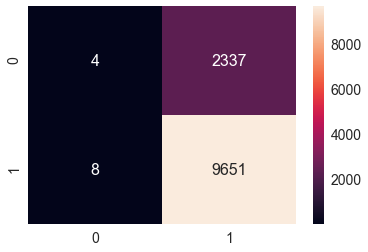

In [34]:
#Using optimal k value to find accuracy,precision,recall,f1_score on test data
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
print("Accuracy on test set: %0.3f%%"%(accuracy_score(Y_test, pred1)*100))
print("Precision on test set: %0.3f"%(precision_score(Y_test, pred1)))
print("Recall on test set: %0.3f"%(recall_score(Y_test, pred1)))
print("F1-Score on test set: %0.3f"%(f1_score(Y_test, pred1)))
print("Confusion Matrix of test set:\n [ [TN  FP]\n [FN TP] ]\n")
df_cm = pd.DataFrame(confusion_matrix(Y_test,pred1), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

# 4.2.kd-tree Algorithm:

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
f1_score_=[]
acc_score = []
#Taking nearest neighbors as 5,10,15,20,25,30......50
neigh = list(range(5,50,5))
#finding the optimal k using maximum f1_score value
for k in neigh:
    print(k,end=',') 
    pred = []
    knn = KNeighborsClassifier(n_neighbors=k,algorithm='kd_tree')
    knn.fit(tfidf_w2v_tr, y_tr)
    #taking cross validate data in intervals of 500 for prediction
    for i in range(0,len(tfidf_w2v_cv), 500):
        t = tfidf_w2v_cv[i:i+500]
        pred1 = knn.predict(t)
        pred.extend(pred1)
    k= f1_score(y_cv,pred)
    print(k)
    f1_score_.append(k)
#list of f1_scores for respective nearest neighbors    
print("f1_score on cross validate data:",f1_score_)
#finding accuracy on test data with predicted values
accuracy = accuracy_score(Y_test, pred)
print("Accuracy on test data for n nearest neighbours:",accuracy * 100)

5,0.893280266568
10,0.902226702098
15,0.905389986765
20,0.905331385795
25,0.906255699435
30,0.906255699435
35,0.906281338317
40,0.906446612565
45,0.90633119103
f1_score on cross validate data: [0.8932802665679378, 0.90222670209841471, 0.90538998676463878, 0.90533138579514338, 0.90625569943461604, 0.90625569943461604, 0.90628133831707536, 0.90644661256496761, 0.90633119102967319]
Accuracy on test data for n nearest neighbours: 80.3666666667


In [36]:
#finding the optimal k using maximum f1_score value
print("maximum f1 score value",max(f1_score_))
#finding the index value of f1_score value which is maximum
a=f1_score_.index(max(f1_score_)) 
print("best f1 score index value:",a)
#optimal k value index is same as maximum f1 score index value
optimal_k=neigh[a]
print("optimal k value:",optimal_k)

maximum f1 score value 0.906446612565
best f1 score index value: 7
optimal k value: 40


In [37]:
#Using optimal k value to find accuracy on test data
knn_optimal = KNeighborsClassifier(n_neighbors  = optimal_k,algorithm='kd_tree')
knn_optimal.fit(tfidf_w2v_tr,y_tr)
pred1 = []
for i in range(0,len(tfidf_w2v_test),200):
    y = tfidf_w2v_test[i:i+200]
    pred = knn_optimal.predict(y)
    pred1.extend(pred)
accuracy = accuracy_score(Y_test, pred1)
print("Accuracy on test data:",accuracy * 100)

Accuracy on test data: 80.4583333333


Accuracy on test set: 80.458%
Precision on test set: 0.805
Recall on test set: 0.999
F1-Score on test set: 0.892
Confusion Matrix of test set:
 [ [TN  FP]
 [FN TP] ]



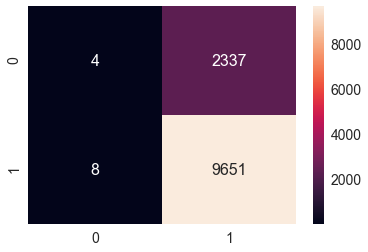

In [38]:
#Using optimal k value to find accuracy,precision,recall,f1_score on test data
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
print("Accuracy on test set: %0.3f%%"%(accuracy_score(Y_test, pred1)*100))
print("Precision on test set: %0.3f"%(precision_score(Y_test, pred1)))
print("Recall on test set: %0.3f"%(recall_score(Y_test, pred1)))
print("F1-Score on test set: %0.3f"%(f1_score(Y_test, pred1)))
print("Confusion Matrix of test set:\n [ [TN  FP]\n [FN TP] ]\n")
df_cm = pd.DataFrame(confusion_matrix(Y_test,pred1), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

# Summary

**K-nn with BOW,TF-IDF,AVG-W2v,TF-IDF W2V text classifications and Optimal-k ,Brute Force algorithms:**

|          |sample size|Optimal_K|Brute Force   |              |              |            |                            
|----------|-----------|---------|--------------|--------------|--------------|------------| 
|          |           |         |Accuracy      |Precision     |Recall        |F1-score    |
|BOW       |  60k      |   15    |   81.40%     |    0.815     |    0.994     |  0.896     |
|TF-IDF    |  60k      |   10    |   81.72%     |    0.823     |    0.985     |  0.897     |
|Avg-W2V   |  60k      |   45    |   80.23%     |    0.805     |    0.996     |  0.890     |
|TF-IDF W2V|  60k      |   40    |   80.45%     |    0.805     |    0.999     |  0.892     |
    

**K-nn with BOW,TF-IDF,AVG-W2v,TF-IDF W2V text classifications and Optimal-k ,Brute Force algorithms:**

|          |sample size|Optimal_K|kd-tree       |              |              |            |                            
|----------|-----------|---------|--------------|--------------|--------------|------------| 
|          |           |         |Accuracy      |Precision     |Recall        |F1-score    |
|BOW       | 60k       |   45    |   79.59%     |  0.804       |  0.987       |0.866       |
|TF-IDF    | 60k       |   45    |   80.42%     |  0.805       |  0.999       |0.892       |
|Avg-W2V   | 60k       |   45    |   80.23%     |  0.805       |  0.996       |0.890       |
|TF-IDF W2V| 60k       |   40    |   80.45%     |  0.805       |  0.999       |0.892       |


**observation:**
              By comparing above table, for our data Avg-w2v with knn is working better.
    